In [13]:
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
from pyod.models.ocsvm import OCSVM
from pyod.models.deep_svdd import DeepSVDD
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

# EX 1

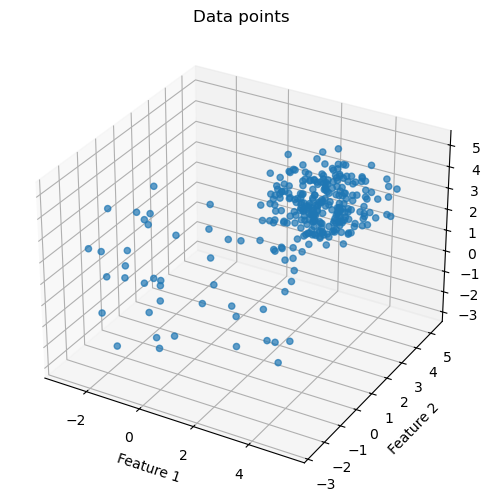

In [14]:
x_train, x_test, y_train, y_test = generate_data(
    n_train=300,
    n_test=200,
    n_features=3,
    contamination=0.15,
    random_state=9000
)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    x_train[:, 0],
    x_train[:, 1],
    x_train[:, 2],
    s=20,
    alpha=0.7
)

ax.set_title("Data points")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()

In [15]:

def deepSVDD(x_train):
    model = DeepSVDD(contamination=0.15,
                     epochs=100,
                     batch_size=32,
                     verbose=True,
                     n_features=x_train.shape[1],)
    model.fit(x_train)

    scores_test = model.decision_function(x_test)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    return scores_test, y_pred_test, y_pred_train

def ocsvm(x_train,kernel = 'linear'):
    model = OCSVM(contamination=0.15, kernel=kernel)
    model.fit(x_train)

    scores_test = model.decision_function(x_test)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    return scores_test, y_pred_test, y_pred_train

scores_test, y_pred_test, y_pred_train = ocsvm(x_train,kernel='linear')

ba_score = balanced_accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, scores_test)

print("Balanced accuracy:", ba_score)
print("ROC AUC:", roc_auc)

Balanced accuracy: 0.9578431372549019
ROC AUC: 0.9988235294117647


In [16]:

def plot4axes(x_train, x_test, y_train, y_test, model_name):
    fig = plt.figure(figsize=(14, 10))

    # train ground truth
    ax1 = fig.add_subplot(2, 2, 1, projection='3d')

    # inliers (y_train == 0)
    ax1.scatter(
        x_train[y_train == 0, 0],
        x_train[y_train == 0, 1],
        x_train[y_train == 0, 2],
        c='blue',
        s=15,
        alpha=0.7,
        label='Inlier'
    )

    # outliers (y_train == 1)
    ax1.scatter(
        x_train[y_train == 1, 0],
        x_train[y_train == 1, 1],
        x_train[y_train == 1, 2],
        c='red',
        s=20,
        alpha=0.8,
        label='Outlier'
    )

    ax1.set_title("Train - Ground truth")
    ax1.set_xlabel("Feature 1")
    ax1.set_ylabel("Feature 2")
    ax1.set_zlabel("Feature 3")
    ax1.legend()


    # test ground truth
    ax2 = fig.add_subplot(2, 2, 2, projection='3d')

    ax2.scatter(
        x_test[y_test == 0, 0],
        x_test[y_test == 0, 1],
        x_test[y_test == 0, 2],
        c='blue',
        s=15,
        alpha=0.7,
        label='Inlier'
    )

    ax2.scatter(
        x_test[y_test == 1, 0],
        x_test[y_test == 1, 1],
        x_test[y_test == 1, 2],
        c='red',
        s=20,
        alpha=0.8,
        label='Outlier'
    )

    ax2.set_title("Test - Ground truth")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")
    ax2.set_zlabel("Feature 3")
    ax2.legend()

    # train predictions
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')

    ax3.scatter(
        x_train[y_pred_train == 0, 0],
        x_train[y_pred_train == 0, 1],
        x_train[y_pred_train == 0, 2],
        c='green',
        s=15,
        alpha=0.7,
        label='Pred inlier'
    )

    ax3.scatter(
        x_train[y_pred_train == 1, 0],
        x_train[y_pred_train == 1, 1],
        x_train[y_pred_train == 1, 2],
        c='orange',
        s=20,
        alpha=0.8,
        label='Pred outlier'
    )

    ax3.set_title(f"Train - {model_name} predictions")
    ax3.set_xlabel("Feature 1")
    ax3.set_ylabel("Feature 2")
    ax3.set_zlabel("Feature 3")
    ax3.legend()

    # test predictions
    ax4 = fig.add_subplot(2, 2, 4, projection='3d')

    ax4.scatter(
        x_test[y_pred_test == 0, 0],
        x_test[y_pred_test == 0, 1],
        x_test[y_pred_test == 0, 2],
        c='green',
        s=15,
        alpha=0.7,
        label='Pred inlier'
    )

    ax4.scatter(
        x_test[y_pred_test == 1, 0],
        x_test[y_pred_test == 1, 1],
        x_test[y_pred_test == 1, 2],
        c='orange',
        s=20,
        alpha=0.8,
        label='Pred outlier'
    )

    ax4.set_title(f"Test - {model_name} predictions")
    ax4.set_xlabel("Feature 1")
    ax4.set_ylabel("Feature 2")
    ax4.set_zlabel("Feature 3")
    ax4.legend()

    plt.tight_layout()
    plt.show()


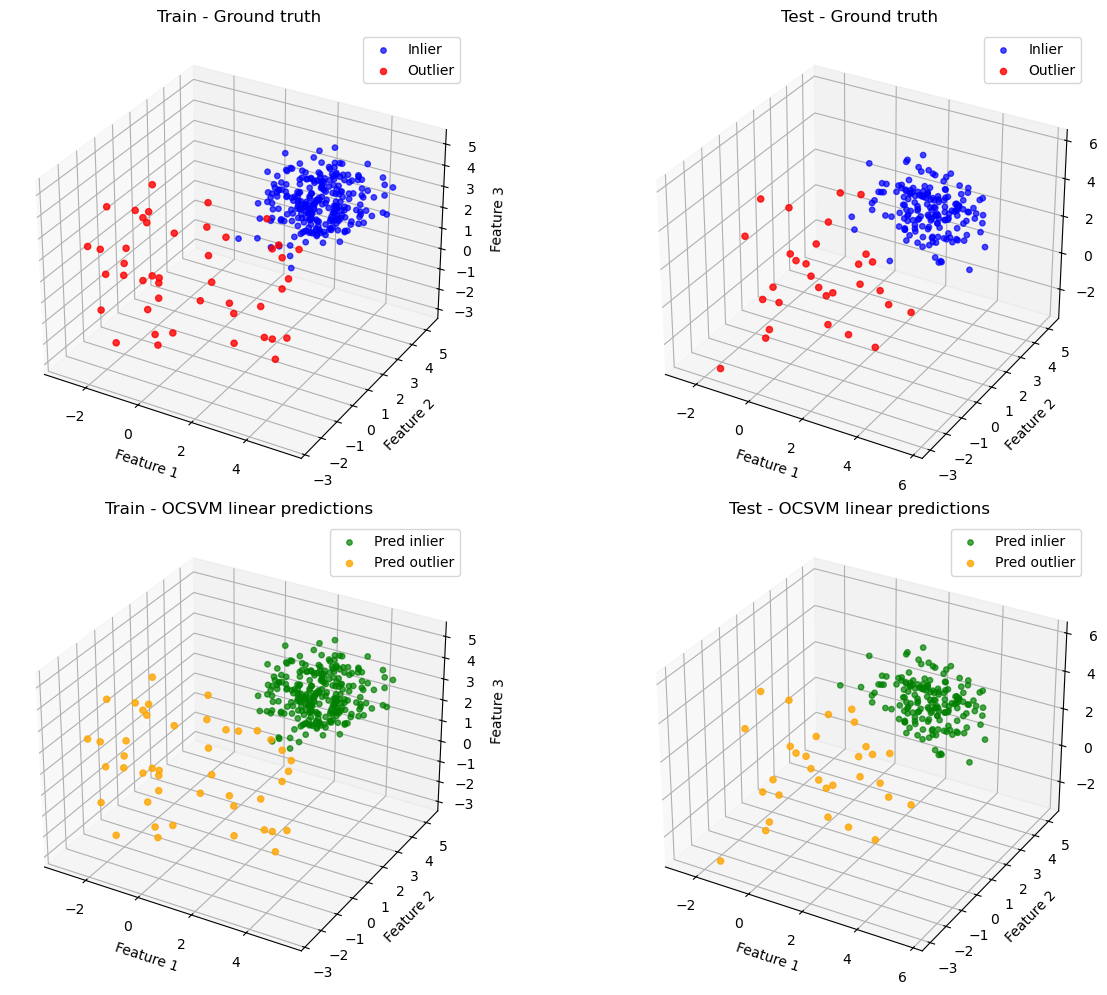

In [17]:
plot4axes(x_train, x_test, y_train, y_test,"OCSVM linear")

In [18]:
scores_test, y_pred_test, y_pred_train = ocsvm(x_train,kernel='rbf')

ba_score = balanced_accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, scores_test)

print("Balanced accuracy:", ba_score)
print("ROC AUC:", roc_auc)

Balanced accuracy: 0.9705882352941176
ROC AUC: 0.9976470588235294


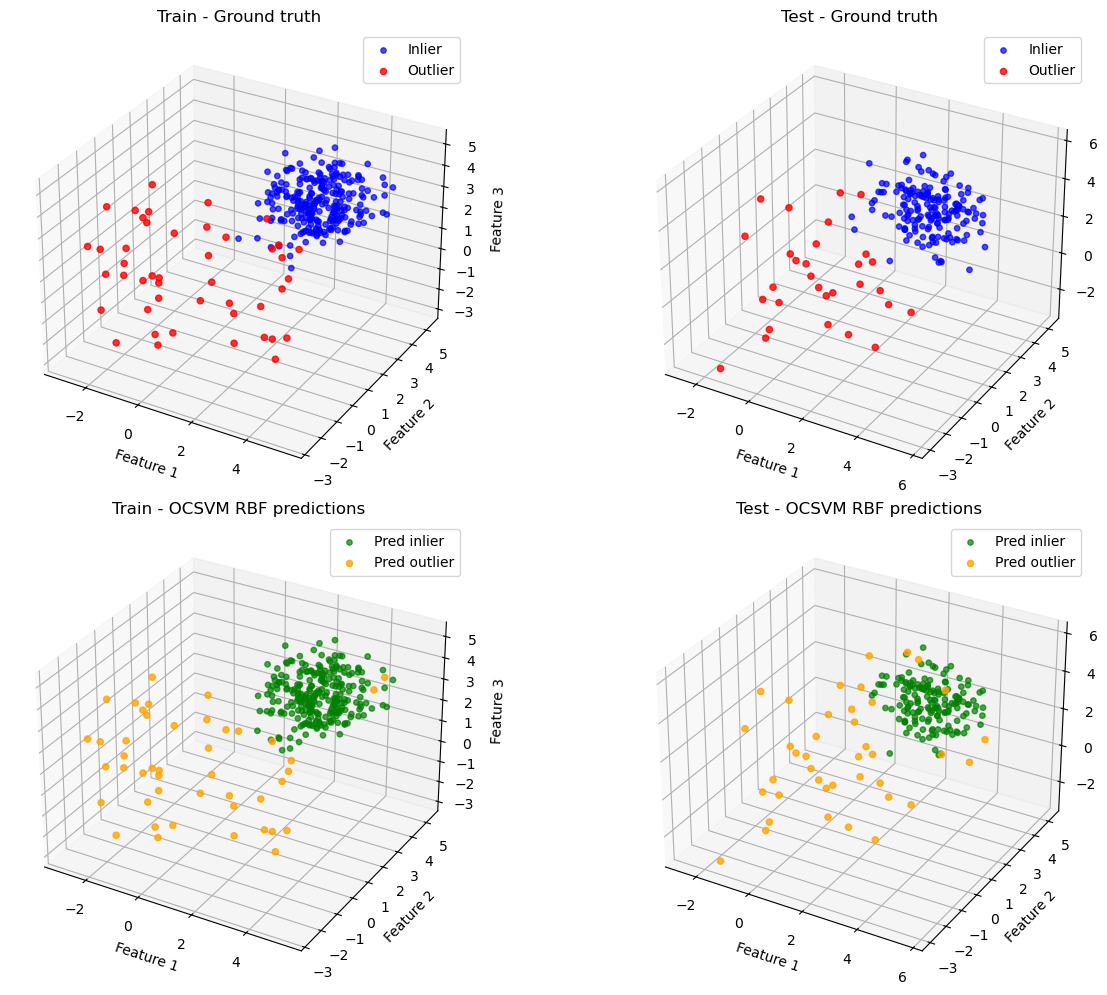

In [19]:
plot4axes(x_train, x_test, y_train, y_test, "OCSVM RBF")

In [20]:
scores_test, y_pred_test, y_pred_train = deepSVDD(x_train)

ba_score = balanced_accuracy_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, scores_test)

print("Balanced accuracy:", ba_score)
print("ROC AUC:", roc_auc)

Epoch 1/100, Loss: 7.534143894910812
Epoch 2/100, Loss: 7.65997701883316
Epoch 3/100, Loss: 7.904955685138702
Epoch 4/100, Loss: 7.933304071426392
Epoch 5/100, Loss: 7.942779123783112
Epoch 6/100, Loss: 7.609093397855759
Epoch 7/100, Loss: 7.572265118360519
Epoch 8/100, Loss: 7.591929495334625
Epoch 9/100, Loss: 7.643895387649536
Epoch 10/100, Loss: 7.938310861587524
Epoch 11/100, Loss: 7.566128075122833
Epoch 12/100, Loss: 7.678417593240738
Epoch 13/100, Loss: 8.163842558860779
Epoch 14/100, Loss: 7.559507519006729
Epoch 15/100, Loss: 7.622464179992676
Epoch 16/100, Loss: 7.744912415742874
Epoch 17/100, Loss: 8.00559288263321
Epoch 18/100, Loss: 7.753756642341614
Epoch 19/100, Loss: 7.687433838844299
Epoch 20/100, Loss: 7.740185022354126
Epoch 21/100, Loss: 7.647832691669464
Epoch 22/100, Loss: 7.832936882972717
Epoch 23/100, Loss: 7.900995314121246
Epoch 24/100, Loss: 7.5863059759140015
Epoch 25/100, Loss: 7.773963153362274
Epoch 26/100, Loss: 7.673821270465851
Epoch 27/100, Loss: 8.

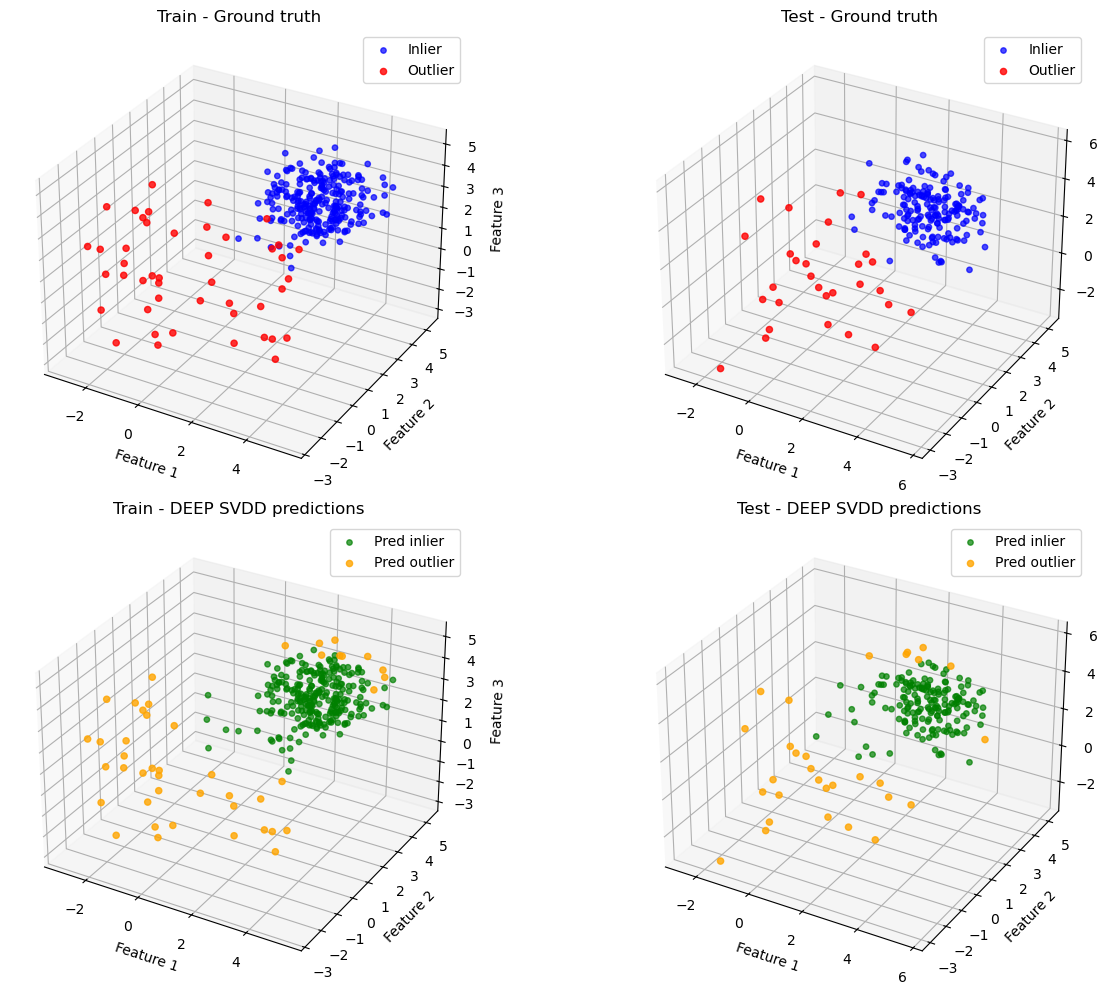

In [21]:
plot4axes(x_train, x_test, y_train, y_test, "DEEP SVDD")

# EX 2

In [22]:
data = loadmat("cardio.mat")
x = data["X"]
y = data["y"].ravel().astype(int)
y = np.where(y == 0, 1, -1)


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=9000, stratify=y)
contamination = np.mean(y_train == -1)
print(contamination)

0.09562841530054644


In [23]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", OneClassSVM())
])

param_grid = [
    {"svm__kernel": ["linear"], "svm__nu": [0.02,0.08,contamination, 0.12, 0.15, 0.18, 0.2,0.25]},
    {"svm__kernel": ["rbf", "poly", "sigmoid"],
     "svm__nu": [0.02,0.08,contamination, 0.12, 0.15, 0.18, 0.2,0.25],
     "svm__gamma": [0.001, 0.005,0.01, 0.02, 0.05, 0.06,0.07,0.08,0.09, 0.1,0.2]},
]

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring=make_scorer(balanced_accuracy_score),
    cv=5,
    n_jobs=-1,
)

grid.fit(x_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
bal_acc = balanced_accuracy_score(y_test, y_pred)

print("Best parameters:", grid.best_params_)
print(f"Test Balanced Accuracy: {bal_acc:.8f}")

Best parameters: {'svm__gamma': 0.001, 'svm__kernel': 'rbf', 'svm__nu': 0.25}
Test Balanced Accuracy: 0.89489635


# EX 3

In [24]:
data = loadmat("shuttle.mat")
x = data["X"]
y = data["y"].ravel().astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=9000, stratify=y)
contamination = y_train.mean()

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
def compute_model_scores(model,x_test,y_test):
    y_pred = model.predict(x_test)
    scores = model.decision_function(x_test)

    ba = balanced_accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, scores)

    return ba,roc

In [26]:
ocsvm = OCSVM(kernel='rbf',
              contamination=contamination,
              nu=contamination)

ocsvm.fit(x_train)

ba,roc = compute_model_scores(ocsvm,x_test,y_test)

print(f"BA score for OCSVM: {ba:.4f}")
print(f"ROC AUC score for ocsvm: {roc:.4f}")

BA score for OCSVM: 0.7162
ROC AUC score for ocsvm: 0.8682


In [27]:
architectures = [
    [8,4],
    [12,6],
    [16, 8],
    [20,10],
    [32, 16],
    [64, 32],
    [128, 64],
    [64, 32, 16,8],
]

results = []

for arch in architectures:
    deepsvdd = DeepSVDD(
        n_features=x_train.shape[1],
        hidden_neurons=arch,
        contamination=contamination,
        epochs=20,
        random_state=9000,
        verbose=False,
    )

    deepsvdd.fit(x_train)
    ba,roc = compute_model_scores(deepsvdd,x_test,y_test)

    results.append((arch, ba, roc))

Epoch 1/20, Loss: 42.73122902447358
Epoch 2/20, Loss: 42.73147879727185
Epoch 3/20, Loss: 42.72165382397361
Epoch 4/20, Loss: 42.722328037023544
Epoch 5/20, Loss: 42.721925128949806
Epoch 6/20, Loss: 42.72278426354751
Epoch 7/20, Loss: 42.75011828332208
Epoch 8/20, Loss: 42.72100130817853
Epoch 9/20, Loss: 42.72031580354087
Epoch 10/20, Loss: 42.724541772156954
Epoch 11/20, Loss: 42.730726924026385
Epoch 12/20, Loss: 42.71971592353657
Epoch 13/20, Loss: 42.72993102832697
Epoch 14/20, Loss: 42.72723858105019
Epoch 15/20, Loss: 42.74662426114082
Epoch 16/20, Loss: 42.75906623760238
Epoch 17/20, Loss: 42.74267491954379
Epoch 18/20, Loss: 42.720938441110775
Epoch 19/20, Loss: 42.73833409929648
Epoch 20/20, Loss: 42.73797055683099
Epoch 1/20, Loss: 72.06487063411623
Epoch 2/20, Loss: 72.03408689144999
Epoch 3/20, Loss: 72.04788251407444
Epoch 4/20, Loss: 72.09181078244
Epoch 5/20, Loss: 72.12323385477066
Epoch 6/20, Loss: 72.08658299408853
Epoch 7/20, Loss: 72.03342338744551
Epoch 8/20, Los

In [28]:
for arch, ba, roc in results:
    print(f"DeepSVDD architecture {arch}")
    print(f"BA score: {ba:.4f}")
    print(f"ROC AUC score: {roc:.4f}")
    print()


DeepSVDD architecture [8, 4]
BA score: 0.4755
ROC AUC score: 0.3402

DeepSVDD architecture [12, 6]
BA score: 0.5483
ROC AUC score: 0.7659

DeepSVDD architecture [16, 8]
BA score: 0.6048
ROC AUC score: 0.9151

DeepSVDD architecture [20, 10]
BA score: 0.7525
ROC AUC score: 0.9334

DeepSVDD architecture [32, 16]
BA score: 0.9097
ROC AUC score: 0.9884

DeepSVDD architecture [64, 32]
BA score: 0.9719
ROC AUC score: 0.9925

DeepSVDD architecture [128, 64]
BA score: 0.9462
ROC AUC score: 0.9880

DeepSVDD architecture [64, 32, 16, 8]
BA score: 0.9673
ROC AUC score: 0.9816

